# Week 6 Halftime Analysis: Our Progress to Reveal the Economic and Social Costs of the Olympics

## By Adam and Juliette

Welcome to a walkthrough of our 6 week exploration of data! This data is assisting us in answering our research question "What economic and societal impacts the Olympics have on countries around the world?" Please follow along with our notebook to see the data discoveries we have made thus far.


Here are accompanying links.

Jupyterhub: https://jupyter.idre.ucla.edu/user/adamkaba18@yahoo.com/notebooks/21W-DH140/Midterm%20Final.ipynb
        
project slides: https://docs.google.com/presentation/d/1UiD7jskcQLD23IoZqYzIqlLCXQpQZe9jkwtPIreMATw/edit?ts=60239445#slide=id.g9a4175c6c2_0_246

### Loading Data and Starting on Our Data Exploration

Action:Firstly, we are going to load the necessary data and packages into the kernal so that we can begin to explore our data. 

Result:Thanks to these packages, such as geopandas and plotly, we will be able to spatial visualize our data and create intrigueing visualizations from our findings.


In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd
import contextily as ctx
import matplotlib.pyplot as plt
import plotly
import plotly.graph_objects as go
import plotly.offline as offline

Our first dataset is a table with the cost per event and per athlete of the past summer and winter Olympic games. We will begin to analyze this be seeing its general shape and what variables there are to analyze. 

In [2]:
df = pd.read_csv('Cost_event_athlete.csv')
df.head()

Games  Year        Country    Type  Cost per event, mio. USD  \
0        Tokyo  1964          Japan  Summer                       1.7   
1       Munich  1972        Germany  Summer                       5.2   
2     Montreal  1976         Canada  Summer                      30.8   
3       Moscow  1980   Soviet Union  Summer                      31.2   
4  Los Angeles  1984  United States  Summer                       3.3   

   Cost per athlete, mio. USD  event,  
0                         0.1     NaN  
1                         0.1     NaN  
2                         1.0     NaN  
3                         1.2     NaN  
4                         0.1     NaN

Action: Replacing Soviet Union- with Russia.

Result: Since the Soviet Union no longer exist, and the games took place in Moscow, we will just change the location to Russia to have more organized and consistant data.

In [3]:
df = df.replace('Soviet Union', 'Russia')
df

Games  Year         Country    Type  Cost per event, mio. USD  \
0            Tokyo  1964           Japan  Summer                       1.7   
1           Munich  1972         Germany  Summer                       5.2   
2         Montreal  1976          Canada  Summer                      30.8   
3           Moscow  1980          Russia  Summer                      31.2   
4      Los Angeles  1984   United States  Summer                       3.3   
5        Barcelona  1992           Spain  Summer                      37.7   
6          Atlanta  1996   United States  Summer                      15.3   
7           Sydney  2000       Australia  Summer                      16.8   
8           Athens  2004          Greece  Summer                       9.8   
9          Beijing  2008           China  Summer                      22.5   
10          London  2012  United Kingdom  Summer                      49.5   
11             Rio  2016          Brazil  Summer                      14.9   
12       Innsbruck  1964         Austria  Winter                       0.6   
13        Grenoble  1968          France  Winter                      25.4   
14         Sapporo  1972           Japan  Winter                       3.4   
15       Innsbruck  1976         Austria  Winter                       3.2   
16     Lake Placid  1980   United States  Winter                      11.5   
17         Calgary  1988          Canada  Winter                      24.1   
18     Albertville  1992          France  Winter                      35.0   
19     Lillehammer  1994          Norway  Winter                      36.5   
20          Nagano  1998           Japan  Winter                      32.7   
21  Salt Lake City  2002   United States  Winter                      32.3   
22          Torino  2006           Italy  Winter                      52.0   
23       Vancouver  2010          Canada  Winter                      29.5   
24           Sochi  2014          Russia  Winter                     223.4   

    Cost per athlete, mio. USD  event,  
0                         0.10     NaN  
1                         0.10     NaN  
2                         1.00     NaN  
3                         1.20     NaN  
4                         0.10     NaN  
5                         1.00     NaN  
6                         0.40     NaN  
7                         0.50     NaN  
8                         0.30     NaN  
9                         0.60     NaN  
10                        1.40     NaN  
11                        0.40     NaN  
12                        0.02     NaN  
13                        0.80     NaN  
14                        0.10     NaN  
15                        0.10     NaN  
16                        0.40     NaN  
17                        0.80     NaN  
18                        1.10     NaN  
19                        1.30     NaN  
20                        1.00     NaN  
21                        1.10     NaN  
22                        1.70     NaN  
23                        1.00     NaN  
24                        7.90     NaN

Action: Now we will analyze the cost per event and per athlete of both summer and winter Olympic games.

Result: This will allow us to look for interesting trends in the data to see if we can find a correlation.

Text(0.5, 1.0, 'Cost per event and per athlete Winter Olympics')

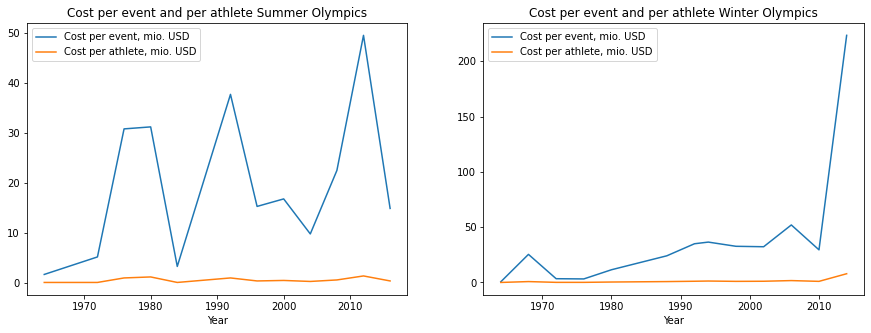

In [4]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
df[df["Type"] == "Summer"].plot(x="Year", y=["Cost per event, mio. USD", "Cost per athlete, mio. USD"], ax = ax[0])
ax[0].set(title = "Cost per event and per athlete Summer Olympics")

df[df["Type"] == "Winter"].plot(x="Year", y=["Cost per event, mio. USD", "Cost per athlete, mio. USD"], ax = ax[1])
plt.title('Cost per event and per athlete Winter Olympics')

Findings: By looking at the graphs, it is interesting to see the general growth in both cost per event and per athlete at the games throughout history. This tells us that the games are getting more expensive to host every year, although what differs is that generally summer Olympics have fluctuated, but with an upward trend, while the winter Olympics have mostly risen before skyrocketing as of recent. This could possibly mean a general difference in cost to host a summer Olympic vs a Winter Olympic, but shows us that both games are becoming more and more expensive to host.

### Economic costs of the Olympics

Action: We will install pycountry and matplotlib.

Result: We will be able to assign 3 letter Alpha codes to the countries in our dataset, allowing us visually spatialize our data later.

In [5]:
%matplotlib inline

In [6]:
pip install pycountry


Note: you may need to restart the kernel to use updated packages.


In [7]:
import pycountry

Action: Creating a new column for the 3 letter country code.

Result: This will give the 3 alpha code a place to go, which will allow us to use that column to spatialize our data,

In [8]:
def alpha3code(column):
    CODE=[]
    for country in column:
        try:
            code=pycountry.countries.get(name=country).alpha_3
            CODE.append(code)
        except:
            CODE.append('None')
    return CODE

Action and Result: I am replacing the "None" with RUS so that my data will have the appropriate 3 letter alpha code for the country which will allow it to appear on my map

In [9]:
df['CODE']=alpha3code(df.Country)
df = df.replace('None', 'RUS')
df.head(23)

Games  Year         Country    Type  Cost per event, mio. USD  \
0            Tokyo  1964           Japan  Summer                       1.7   
1           Munich  1972         Germany  Summer                       5.2   
2         Montreal  1976          Canada  Summer                      30.8   
3           Moscow  1980          Russia  Summer                      31.2   
4      Los Angeles  1984   United States  Summer                       3.3   
5        Barcelona  1992           Spain  Summer                      37.7   
6          Atlanta  1996   United States  Summer                      15.3   
7           Sydney  2000       Australia  Summer                      16.8   
8           Athens  2004          Greece  Summer                       9.8   
9          Beijing  2008           China  Summer                      22.5   
10          London  2012  United Kingdom  Summer                      49.5   
11             Rio  2016          Brazil  Summer                      14.9   
12       Innsbruck  1964         Austria  Winter                       0.6   
13        Grenoble  1968          France  Winter                      25.4   
14         Sapporo  1972           Japan  Winter                       3.4   
15       Innsbruck  1976         Austria  Winter                       3.2   
16     Lake Placid  1980   United States  Winter                      11.5   
17         Calgary  1988          Canada  Winter                      24.1   
18     Albertville  1992          France  Winter                      35.0   
19     Lillehammer  1994          Norway  Winter                      36.5   
20          Nagano  1998           Japan  Winter                      32.7   
21  Salt Lake City  2002   United States  Winter                      32.3   
22          Torino  2006           Italy  Winter                      52.0   

    Cost per athlete, mio. USD  event, CODE  
0                         0.10     NaN  JPN  
1                         0.10     NaN  DEU  
2                         1.00     NaN  CAN  
3                         1.20     NaN  RUS  
4                         0.10     NaN  USA  
5                         1.00     NaN  ESP  
6                         0.40     NaN  USA  
7                         0.50     NaN  AUS  
8                         0.30     NaN  GRC  
9                         0.60     NaN  CHN  
10                        1.40     NaN  GBR  
11                        0.40     NaN  BRA  
12                        0.02     NaN  AUT  
13                        0.80     NaN  FRA  
14                        0.10     NaN  JPN  
15                        0.10     NaN  AUT  
16                        0.40     NaN  USA  
17                        0.80     NaN  CAN  
18                        1.10     NaN  FRA  
19                        1.30     NaN  NOR  
20                        1.00     NaN  JPN  
21                        1.10     NaN  USA  
22                        1.70     NaN  ITA

Action: We will make geopandas read a file path "Naturalearth" and find the lattitudes and longitudes of the alpha codes from a github account.

Result: By making geopandas read naturalearth and merge with the github account, this will allow the latitude and longitude information in the Github account to be synched with our 3 letter alphacodes. Those 3 letter alphacodes will then be able to be mapped thanks to their correlation with the information in the github account.

In [10]:
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.columns=['pop_est', 'continent', 'name', 'CODE', 'gdp_md_est', 'geometry']

In [11]:
merge=pd.merge(world,df,on='CODE')
location=pd.read_csv('https://raw.githubusercontent.com/melanieshi0120/COVID-19_global_time_series_panel_data/master/data/countries_latitude_longitude.csv')
merge=merge.merge(location,on='name').sort_values(by='Cost per event, mio. USD', ascending=False).reset_index()

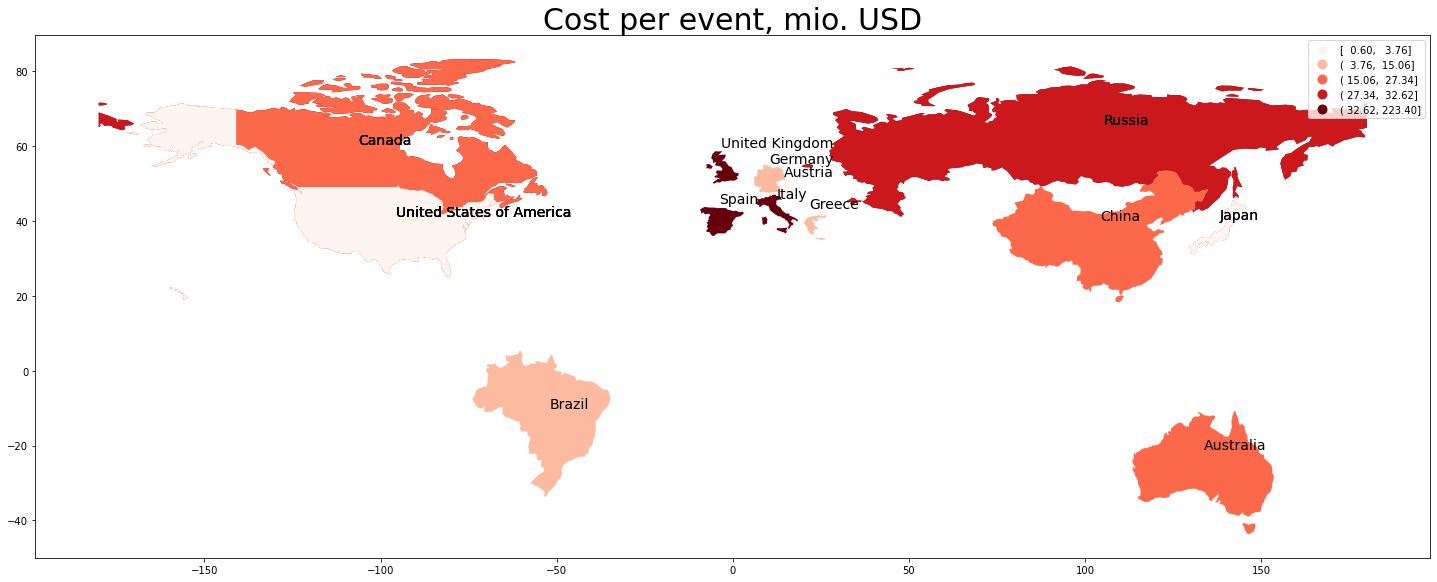

In [12]:

merge.plot(column='Cost per event, mio. USD', scheme="quantiles",
           figsize=(25, 20),
           legend=True,cmap='Reds')
plt.title('Cost per event, mio. USD',fontsize=30)

for i in range(0,20):
    plt.text(float(merge.longitude[i]),float(merge.latitude[i]),"{}\n".format(merge.name[i]),size=14)
plt.show()

Here is a map with the Cost per event in millions of dollars of events in the Olympic games. This map is a great way for us to visualize the countries that have hosted the games. But lets add a basemap for a little more global context.

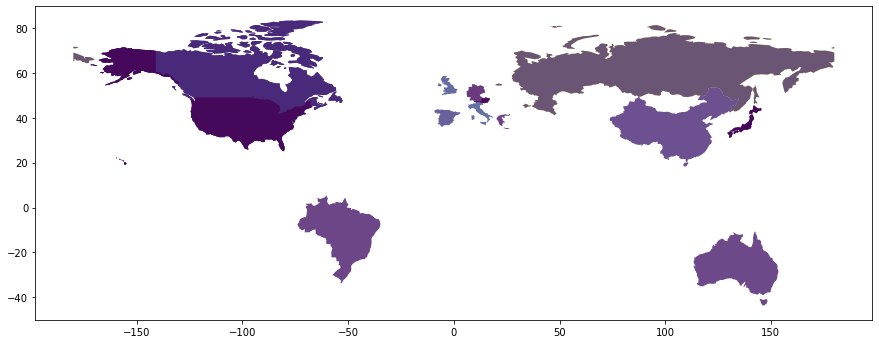

In [13]:
fig, ax = plt.subplots(figsize=(15, 15))
merge.plot('Cost per event, mio. USD',alpha=0.8, ax = ax)

Action and Result: We will convert our map to the mercator projection which will allow us to place a basemap on our map. The basemap will allow us to gain a better understanding of the countries who have hosted the olympics comapred to the countries that have not.

In [14]:
gdf_web_mercator = merge.to_crs(epsg=3857)

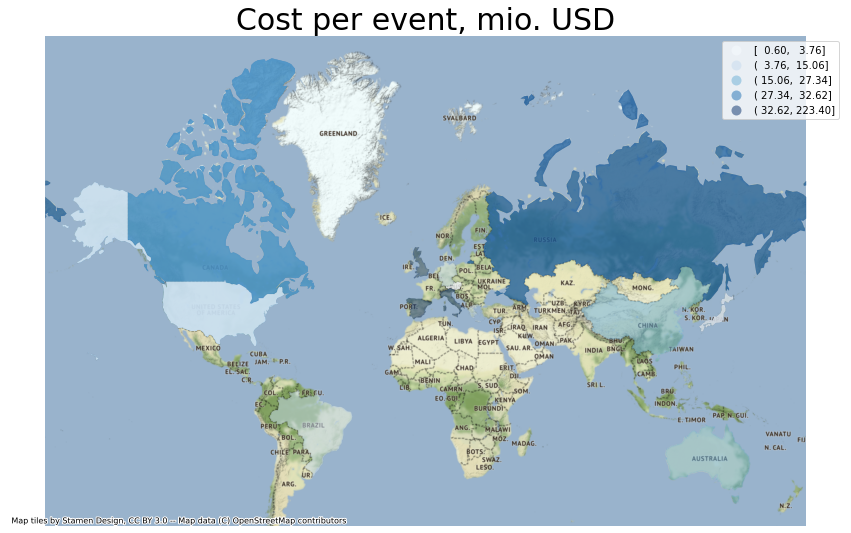

In [15]:
fig, ax = plt.subplots(figsize=(15, 15))
gdf_web_mercator.plot('Cost per event, mio. USD',ax=ax, alpha=0.5,scheme="quantiles",legend=True,cmap='Blues')

ax.axis('off')
ax.set_title('Cost per event, mio. USD',fontsize=30)
ctx.add_basemap(ax)


plt.show()

Analysis: Here, thanks to our map, we can clearly see the countries who have hosted the Olympics and the shading that corresponds to the cost per event of each game in each respective host country. Some interesting findings are that the majority of the games have been held in Northern countries, and places we generally consider "Highly developed". This is interesting to our cause, because it brings up the question "Why are only "highly developed" countries hosting the Olympics?". We believe that this could be due to the large price that comes with hosting the Olympics.As we can see in the map, many countries pay upwards in the millions of dollars to hold a single event. These costs may be extremely difficult for less economically wealthy countries to sustain and this could help answer our question that the Olympucs are in fact a hardy economic burden to host. This is already becoming a problem in our near future, as less and less countries want to host the Olympics due to rising costs to do so.


Now we will move onto our next dataset and load it in to start analyzing. This dataset contains information about the amount of money host countries have lost/ gone over budget due to the games.

### Economic losses due to hosting the Olympics

In [16]:
df2 = pd.read_csv('Outturn.csv')

In [17]:
df2.head(10)

Games  Year        Country    Type  Events  Athletes  \
0         Rome  1960          Italy  Summer     150      5338   
1        Tokyo  1964          Japan  Summer     163      5152   
2  Mexico City  1968         Mexico  Summer     172      5516   
3       Munich  1972        Germany  Summer     195      7234   
4     Montreal  1976         Canada  Summer     198      6048   
5       Moscow  1980   Soviet Union  Summer     203      5179   
6  Los Angeles  1984  United States  Summer     221      6829   
7        Seoul  1988    South Korea  Summer     237      8397   
8    Barcelona  1992          Spain  Summer     257      9356   
9      Atlanta  1996  United States  Summer     271     10318   

  Cost, Billion USD  
0               NaN  
1             0.282  
2             n/a**  
3             1.009  
4             6.093  
5             6.331  
6             0.719  
7               NaN  
8             9.687  
9             4.143

Like before, we will replace Soviet Union with Russia for consistancy and mapping reasons, since mapping the Soviet Union would be very difficult.

In [18]:
df2=df2.replace('Soviet Union','Russia')
df2.head()

Games  Year  Country    Type  Events  Athletes Cost, Billion USD
0         Rome  1960    Italy  Summer     150      5338               NaN
1        Tokyo  1964    Japan  Summer     163      5152             0.282
2  Mexico City  1968   Mexico  Summer     172      5516             n/a**
3       Munich  1972  Germany  Summer     195      7234             1.009
4     Montreal  1976   Canada  Summer     198      6048             6.093

Here, I will conver the floats into integers so they may be analyzed and mapped.

In [19]:
print(df2[df2["Cost, Billion USD"].isnull()])
df2["Cost, Billion USD"] = pd.to_numeric(df2["Cost, Billion USD"], errors='coerce')
df2 = df2.dropna(subset=["Cost, Billion USD"])



           Games  Year        Country    Type  Events  Athletes  \
0           Rome  1960          Italy  Summer     150      5338   
7          Seoul  1988    South Korea  Summer     237      8397   
15  Squaw Valley  1960  United States  Winter      27       665   

   Cost, Billion USD  
0                NaN  
7                NaN  
15               NaN  


In [20]:
df2['Cost, Billion USD'] = df2['Cost, Billion USD'].astype(int)
df2.head(29)

Games  Year         Country    Type  Events  Athletes  \
1            Tokyo  1964           Japan  Summer     163      5152   
3           Munich  1972         Germany  Summer     195      7234   
4         Montreal  1976          Canada  Summer     198      6048   
5           Moscow  1980          Russia  Summer     203      5179   
6      Los Angeles  1984   United States  Summer     221      6829   
8        Barcelona  1992           Spain  Summer     257      9356   
9          Atlanta  1996   United States  Summer     271     10318   
10          Sydney  2000       Australia  Summer     300     10651   
11          Athens  2004          Greece  Summer     301     10625   
12         Beijing  2008           China  Summer     302     10942   
13          London  2012  United Kingdom  Summer     302     10568   
14             Rio  2016          Brazil  Summer     306     10500   
16       Innsbruck  1964         Austria  Winter      34      1091   
17        Grenoble  1968          France  Winter      35      1158   
18         Sapporo  1972           Japan  Winter      35      1006   
19       Innsbruck  1976         Austria  Winter      37      1123   
20     Lake Placid  1980   United States  Winter      38      1072   
22         Calgary  1988          Canada  Winter      46      1432   
23     Albertville  1992          France  Winter      57      1801   
24     Lillehammer  1994          Norway  Winter      61      1737   
25          Nagano  1998           Japan  Winter      68      2176   
26  Salt Lake City  2002   United States  Winter      78      2399   
27          Torino  2006           Italy  Winter      84      2508   
28       Vancouver  2010          Canada  Winter      86      2566   
29           Sochi  2014          Russia  Winter      98      2780   

    Cost, Billion USD  
1                   0  
3                   1  
4                   6  
5                   6  
6                   0  
8                   9  
9                   4  
10                  5  
11                  2  
12                  6  
13                 14  
14                  4  
16                  0  
17                  0  
18                  0  
19                  0  
20                  0  
22                  1  
23                  1  
24                  2  
25                  2  
26                  2  
27                  4  
28                  2  
29                 21

Now that our data is organized, lets start to visualize it. We will make some maps to see the total economic overturn and loss due to the Olympics.

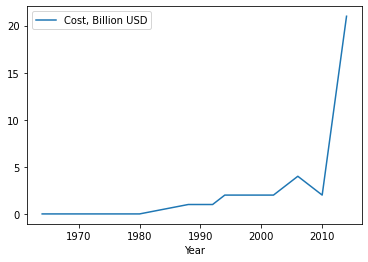

In [21]:
df2[df2["Type"] == "Winter"].plot(x="Year", y="Cost, Billion USD") 

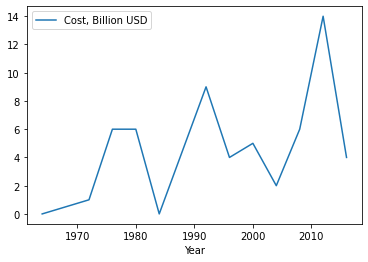

In [22]:
df2[df2["Type"] == "Summer"].plot(x="Year", y="Cost, Billion USD") 

These maps are great, but I lets visualize them with Plotly to see what we can find.

In [23]:
fig = go.Figure(data=[go.Scatter(
    x=df2[df2["Type"] == "Winter"]["Year"],
    y=df2[df2["Type"] == "Winter"]["Cost, Billion USD"], 
    mode='markers',
    text=df2[df2["Type"] == "Winter"]["Games"],
    marker=dict(
        color=df2[df2["Type"] == "Winter"]["Cost, Billion USD"]*10, 
        size=df2[df2["Type"] == "Winter"]["Cost, Billion USD"]*10, 
        showscale=True
        )
)])
fig.show()

fig = go.Figure(data=[go.Scatter(
    x=df2[df2["Type"] == "Summer"]["Year"],
    y=df2[df2["Type"] == "Summer"]["Cost, Billion USD"], 
    mode='markers',
    text=df2[df2["Type"] == "Summer"]["Games"],
    marker=dict(
        color=df2[df2["Type"] == "Summer"]["Cost, Billion USD"]*10, 
        size=df2[df2["Type"] == "Summer"]["Cost, Billion USD"]*10
        )
)])

fig.show()


Here we have 2 plotly graphs that show the economic losses from hosting the Olympics, with the top graph being the Winter Olympics and the bottom being the Summer Olympics. What is intersting about these is that there is a difference in trends between the Summer and Winter Olympic games losses. In the top winter games graph, the bubbles in the early 20th century are so small you can barely see them, thus signalling very small economic loss.This trend then gradually changes over time, rising in price every game into the future. This is different to the Summer games map, where many of the bubbles are close to the same size until we reach the end. While both maps differ in patterns, what is compelling is that both maps do in fact show us that the Olympics are a great economic undertaking. Every Olympic game host countries lose into the hundreds of millions of dollars. What this tells us is that the games are indeed a large economic undertaking, and so large in fact that other less developed countries are unable to even attempt to host. This was clearly seen in our previous graph with the world map, and how only highly devloped countries have hosted the Olympics. Ultimately this spells bad news for the Olympics in the future, because if the enormous cost continues to limit only developed countries to hosting the games, when even those countries dont want to take on the economic burden, then the games will to go on.


We are now installing Pywaffle so we can make waffle graphs. These graphs will allow us to visualize and show our data in interesting and compelling ways.

### Womens role in the Olympics

In [24]:
pip install pywaffle

Note: you may need to restart the kernel to use updated packages.


In [25]:
from pywaffle import Waffle

In [26]:
import math

Action: Importing data. The first dataset has information about the growth of womens events and competitors in the olympics.  The second is data we already saw early about cost per event.

In [27]:
wp = pd.read_csv('womens_part.csv')
df3= pd.read_csv('Cost_event_athlete.csv')

In [28]:
wp.head(27)

year  sports  womens_events  total_events  %_of_womens_events  \
0   1900       2              2            95                 2.1   
1   1904       1              3            91                 3.3   
2   1908       2              4           110                 3.6   
3   1912       2              5           102                 4.9   
4   1920       2              8           154                 5.2   
5   1924       3             10           126                 7.9   
6   1928       4             14           109                12.8   
7   1932       3             14           117                12.0   
8   1936       4             15           129                11.6   
9   1948       5             19           136                14.0   
10  1952       6             25           149                16.8   
11  1956       6             26           151                17.2   
12  1960       6             29           150                19.3   
13  1964       7             33           163                20.2   
14  1968       7             39           172                22.7   
15  1972       8             43           195                22.1   
16  1976      11             49           198                24.7   
17  1980      12             50           203                24.6   
18  1984      14             62           221                28.1   
19  1988      17             72           237                30.4   
20  1992      19             86           257                33.5   
21  1996      21             97           271                35.8   
22  2000      25            120           300                40.0   
23  2004      26            125           301                41.5   
24  2008      26            127           302                42.1   
25  2012      26            140           302                46.4   
26  2016      28            145           306                47.4   

    women_participants  %_of_women_participants  
0                   22                      2.2  
1                    6                      0.9  
2                   37                      1.8  
3                   48                      2.0  
4                   63                      2.4  
5                  135                      4.4  
6                  277                      9.6  
7                  126                      9.0  
8                  331                      8.3  
9                  390                      9.5  
10                 519                     10.5  
11                 376                     13.3  
12                 611                     11.4  
13                 678                     13.2  
14                 781                     14.2  
15                1059                     14.6  
16                1260                     20.7  
17                1115                     21.5  
18                1566                     23.0  
19                2194                     26.1  
20                2707                     28.8  
21                3512                     34.0  
22                4069                     38.2  
23                4329                     40.7  
24                4637                     42.4  
25                4676                     44.2  
26                4700                     45.0

Text(0.5, 1.0, 'Cost per event and per athlete Winter Olympics')

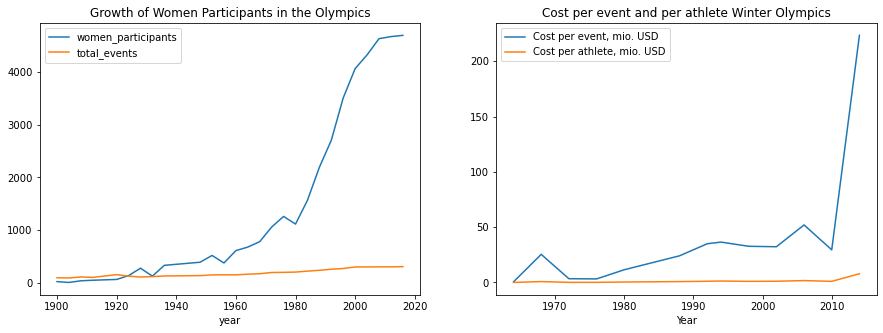

In [29]:
fig, ax = plt.subplots(1,2, figsize = (15,5))
wp.plot(x="year", y=["women_participants","total_events"], ax = ax[0])
ax[0].set(title = "Growth of Women Participants in the Olympics")

df3[df3["Type"] == "Winter"].plot(x="Year", y=["Cost per event, mio. USD","Cost per athlete, mio. USD"], ax = ax[1])
plt.title('Cost per event and per athlete Winter Olympics')

Here, we can see the huge growth of womens total events and women participants in the Olympics, as well as the rise in cost per event and per athlete in the Winter Olympics. What is interesting about looking at these charts side by side is that we can see how both graphs rise positively. This makes us wonder if the rise in the number of events and participants, mostly due to allowing a large number of new participants (women) into the Olympics has also drastically risen the price of the Olympics. If the rise in events and participants affects the price, this means that the future of the Olympics may lay in limiting the growth of events, as more events may mean an even great economic burden which excludes many countries around the world from hosting.

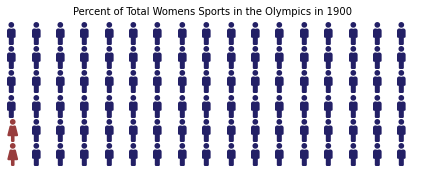

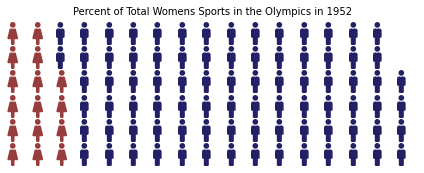

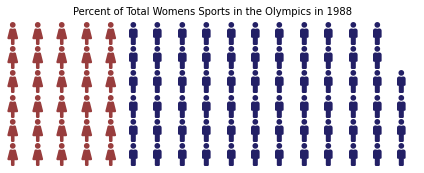

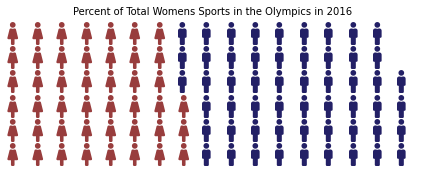

In [30]:
fig = plt.figure(
    FigureClass=Waffle, 
    rows=6,  
    values=[2,100],
    colors=("#983D3D","#232066"),
    icons=('female','male'))

plt.title('Percent of Total Womens Sports in the Olympics in 1900',fontsize=10)
plt.show()

fig = plt.figure(
    FigureClass=Waffle, 
    rows=6,  
    values=[16, 84],
    colors=("#983D3D","#232066"),
    icons=('female','male'))
plt.title('Percent of Total Womens Sports in the Olympics in 1952',fontsize=10)
plt.show()

fig = plt.figure(
    FigureClass=Waffle, 
    rows=6,  
    values=[30, 70],
    colors=("#983D3D","#232066"),
    icons=('female','male'))

plt.title('Percent of Total Womens Sports in the Olympics in 1988',fontsize=10)
plt.show()

fig = plt.figure(
    FigureClass=Waffle, 
    rows=6,  
    values=[45, 55],
    colors=("#983D3D","#232066"),
    icons=('female','male'))

plt.title('Percent of Total Womens Sports in the Olympics in 2016',fontsize=10)
plt.show()

Here is the gender breakdown of the total number of women who competed in the Olympics compared to men from 1900 to 2016. As we can see, at the begining of the 20th century, only 2% of participants in the Olympics were women, but as the years have gone by, that number has grown to 16%, 30%, and 45% respectively. What this tells us is that as more women have participated in the Olympics, this has both influenced other women and the Olympic commity to allow more women to compete in the games. While we know that a increase in events and participants ultimately raises the price of the Olympics, we also wonder what social impact womens representation in sports has helped cause. We can already see that in 100 years, attitudes torwards the acceptance of female athletes has become more positive due to their allowance to play in the Olympics. Although it is hard to tell now, we still hypothesize that an increased presence of female athletes on a global stage could possibly influence other young women to persue sports, ultiamtely, having a positive influence socially.

Next we'll take a look at how womens attendance has changed for each country over the course of the games.
I'm going to import a dataset that has a list of every athlete to compete in the games. However, since this list is very big, we'll be getting what we need from it and removing it.

In [31]:
olympics = pd.merge(pd.read_csv("athlete_events.csv"),pd.read_csv("noc_regions.csv"), on = "NOC")
print(olympics.shape)
olympics.head()

(270767, 17)


ID           Name Sex   Age  Height  Weight   Team  NOC        Games  \
0     1      A Dijiang   M  24.0   180.0    80.0  China  CHN  1992 Summer   
1     2       A Lamusi   M  23.0   170.0    60.0  China  CHN  2012 Summer   
2   602  Abudoureheman   M  22.0   182.0    75.0  China  CHN  2000 Summer   
3  1463      Ai Linuer   M  25.0   160.0    62.0  China  CHN  2004 Summer   
4  1464      Ai Yanhan   F  14.0   168.0    54.0  China  CHN  2016 Summer   

   Year  Season            City       Sport  \
0  1992  Summer       Barcelona  Basketball   
1  2012  Summer          London        Judo   
2  2000  Summer          Sydney      Boxing   
3  2004  Summer          Athina   Wrestling   
4  2016  Summer  Rio de Janeiro    Swimming   

                                      Event Medal region notes  
0               Basketball Men's Basketball   NaN  China   NaN  
1              Judo Men's Extra-Lightweight   NaN  China   NaN  
2                 Boxing Men's Middleweight   NaN  China   NaN  
3  Wrestling Men's Lightweight, Greco-Roman   NaN  China   NaN  
4     Swimming Women's 200 metres Freestyle   NaN  China   NaN

In [32]:
olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 270767 entries, 0 to 270766
Data columns (total 17 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      270767 non-null  int64  
 1   Name    270767 non-null  object 
 2   Sex     270767 non-null  object 
 3   Age     261305 non-null  float64
 4   Height  210684 non-null  float64
 5   Weight  207982 non-null  float64
 6   Team    270767 non-null  object 
 7   NOC     270767 non-null  object 
 8   Games   270767 non-null  object 
 9   Year    270767 non-null  int64  
 10  Season  270767 non-null  object 
 11  City    270767 non-null  object 
 12  Sport   270767 non-null  object 
 13  Event   270767 non-null  object 
 14  Medal   39774 non-null   object 
 15  region  270746 non-null  object 
 16  notes   5039 non-null    object 
dtypes: float64(3), int64(2), object(12)
memory usage: 37.2+ MB


There's a lot of data here, but for now we're only interested in how womens attendance of the olympics in each country has changed. To do this, we'll be grouping by region and year, and using value counts.
Doing this we get the attendance of each sex for each olympics, separated by country.

In [33]:
df = olympics.groupby(["region","Year"])['Sex'].value_counts().to_frame(name = "count").reset_index()
df = df.rename(columns = {"region": "country"})
del olympics
df

country  Year Sex  count
0     Afghanistan  1936   M     16
1     Afghanistan  1948   M     25
2     Afghanistan  1956   M     12
3     Afghanistan  1960   M     16
4     Afghanistan  1964   M      8
...           ...   ...  ..    ...
5658     Zimbabwe  2012   F      5
5659     Zimbabwe  2012   M      4
5660     Zimbabwe  2014   M      2
5661     Zimbabwe  2016   F     22
5662     Zimbabwe  2016   M      9

[5663 rows x 4 columns]

Just like that the olympics data has served it's purpose.

We're going to make an interactive chart to explore female athlete data year by year.
The function we use maps countries by searching for the country name, so we'll be cleaning up the country names.

In [34]:
df = df.replace('USA', 'United States of America')
df = df.replace('UK', 'United Kingdom')
df = df.replace('Soviet Union', "Russia")

The map is going to be segmented on year, which can be controlled via a slider.
Here we set the slider and the data up.

In [35]:
import warnings
#Create data to populate each section of slider
data_slider = []
for year in sorted(df["Year"].unique()):
    df_segmented =  df[(df['Year']== year)]

    for col in df_segmented.columns:
        df_segmented[col] = df_segmented[col].astype(str)

    data_each_yr = dict(
                        type='choropleth',
                        locations = df_segmented.country,
                        z=df_segmented['count'].astype(float),
                        locationmode='country names',
                        colorscale = "greens",)
                        #colorbar= {'title':'# Count'})

    data_slider.append(data_each_yr)

steps = []

#Create slider
for i in range(len(data_slider)):
    if i == 0:
        previous = 1900
        delta = 0
    else:
        previous = sorted(df["Year"].unique())[i-1]
        delta = sorted(df["Year"].unique())[i]- previous
    step = dict(method='restyle',
                args=['visible', [False] * len(data_slider)],
                label='Year {}'.format(delta + previous))
    step['args'][1][i] = True
    steps.append(step)

sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

layout = dict(geo=dict(scope='world',
                       showcountries = True,
                       projection={'type': 'equirectangular'}),
              sliders=sliders)


warnings.filterwarnings('ignore')

<ipython-input-35-4f3b2e3cd298>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [36]:
fig = dict(data=data_slider, layout=layout)
plotly.offline.iplot(fig, show_link = True)

This graph shows how many women athletes every country sent to each olympic games. Some interesting things to note are that the US actually sent 9 women to the olympics in the 1900's. Then after that there was a dry period for some decades. In the past couple decades, the countries that sent the most women were the USA, Canada, Russia, and China. We hypothesize that it's not a coincidence that these are also the richest countries in the world. As we've seen, the olympics have an economic impact on countries. We also hypothesize that there might be some hidden social effects. This could possibly be seen by comparing the ratio of male to female athletes, as opposed to a raw count.

As all these graphs has demonstrated, the Olympics have been great catalysts to increasing womens presence on the global stage of sports, and has also been a finnancial burden on my host countries that only continues to grow. Even with a desire from young women and men to compete in the games, if the games continue to grow in price, we know that they will not be able to continue due to lack of countries willing to host them. Ultimately, our data suggests that changes should be made to stop the rising prices of the Olympics and its future end.

Work split: The work in this notebook was equally contributed by Juliette and Adam. Juliette helped lead the way and write out and plan the narrative for this assignment. Many of the codes were written by Juliette. Juliette also helped create the waffle charts, cost per event charts and helped contribute to the static map. Adam helped by speaheading the cleaning and writing of the more difficult code. Adam direclty contributed to making the static and interactive maps, as well as helped by arranging visualizations side by side. Both students equally helped in finding data to analyze and visualize.